
<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Giảng viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.n

---
* Họ tên sinh viên: Trịnh Văn Rinh
* Mã sinh viên: 1821050766
* Lớp/Nhóm môn học: 02
* Email: trinhrinh55@gmail.com

---

## CHƯƠNG 4: HỌC KHÔNG GIÁM SÁT - UNSUPERVISED LEARNING
---
Nếu dữ liệu huấn luyện chỉ bao gồm các dữ liệu đầu vào x mà không có đầu ra tương ứng. Các thuật toán machine learning có thể không dự đoán được đầu ra nhưng vẫn trích xuất được những thông tin quan trọng dựa trên mối liên quan giữa các điểm dữ liệu. Các thuật toán trong nhóm này được gọi là học không giám sát (unsupervised learning).

* Học máy có giám sát (Supervised learning): Dự đoán đầu ra (label) của một dữ liệu mới (new sample) dựa trên các cặp (sample, label) đã biết từ trước.
* Học máy không giám sát (Unsupervised learning): chỉ có dữ liệu đầu vào (sample) mà không có nhãn (label).

<img src='pic/pic1.jpg' width='700px'>

– Mục đích là khai phá dữ liệu để tìm ra các cấu trúc nội tại trong dữ liệu để thực hiện một công việc nào đó, ví dụ như phân nhóm (clustering) hoặc giảm số chiều của dữ liệu (dimension reduction) để thuận tiện trong việc lưu trữ và tính toán.


## THỰC HÀNH 10
---
Mô tả tập dữ liệu: Data_seles_Excercise.csv. Dữ liệu mua hàng của 200 MiniMart với một nhà phân phối hàng hóa trong năm 2019. Trong đó:
* Cột No: Mã của MiniMart
* Cột City: Ký hiệu khu vực đặt MiniMart
* Cột Distance: Khoảng cách từ MiniMart tới nhà phân phối.
* Cột Grocery: Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
* Cột Milk: Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019

**YÊU CẦU:**
Sử dụng thuật toán phân cụm Kmeans cho tập dữ liệu với 2 thuộc tính phân cụm: Grocery, Milk:
1. Xác định số cụm tối ưu.
2. Thực hiện phân cụm dữ liệu với số cụm tối ưu đã chỉ ra ở yêu cầu 1. Trực quan hóa, Liệt kê danh sách MiniMart theo từng cụm và cho nhận xét.


In [56]:
#{SINH VIÊN THỰC HIỆN TẠI ĐÂY}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "data/Data_sales_Excercise.csv"

In [57]:
df = pd.read_csv(path)
df

,No,City,Distance,Grocery,Milk
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [58]:
df.columns

Index(['No', 'City', 'Distance', 'Grocery', 'Milk'], dtype='object')

In [59]:
#Quan sát các đặc trưng thống kê:
df.describe()

,No,Distance,Grocery,Milk
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,46.155000,53620.500000,5954.375000
std,57.879185,17.492309,34855.146477,1777.210276
min,1.000000,19.000000,0.000000,2600.000000
25%,50.750000,30.000000,26575.000000,4550.000000
50%,100.500000,47.000000,46400.000000,5775.000000
75%,150.250000,63.000000,78225.000000,7431.250000
max,200.000000,75.000000,143500.000000,10075.000000


In [60]:
df.shape

(200, 5)

# 1. 

In [61]:
#Sử dụng 2 thuộc tính Grocery, Milk để phân cụm dữ liệu
data_cluster = df.iloc[:,3:5]
data_cluster.head()

,Grocery,Milk
0,69900,6325
1,79000,5200
2,85500,7825
3,17100,8375
4,5500,5450


E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


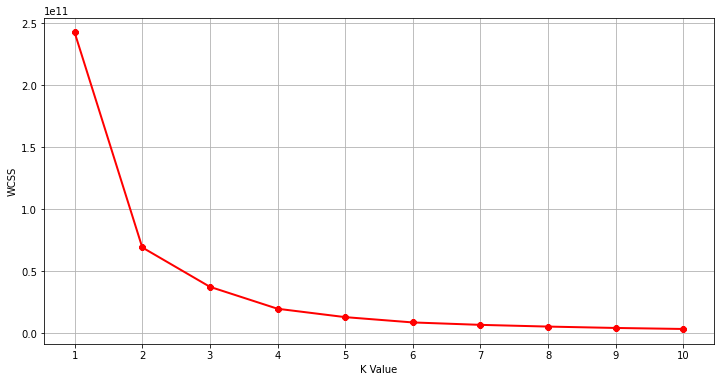

In [62]:
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 10
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df.iloc[:,3:5])
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [63]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 3 cụm, các tham số khác sử dụng mặc định
model_mart = KMeans(n_clusters=3)

In [64]:
#Liệt kê các tham số của mô hình
model_mart.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [65]:
model_mart.fit_predict(df.iloc[:,3:5])

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
df["Cluster"] = model_mart.labels_
df

,No,City,Distance,Grocery,Milk,Cluster
0,1,K,60,69900,6325,2
1,2,K,30,79000,5200,2
2,3,E,52,85500,7825,1
3,4,E,57,17100,8375,0
4,5,E,55,5500,5450,0
...,...,...,...,...,...,...
195,196,E,22,96600,7900,1
196,197,E,39,83700,7675,1
197,198,K,25,34000,4000,0
198,199,K,30,42000,5500,2


0    85
2    69
1    46
Name: Cluster, dtype: int64


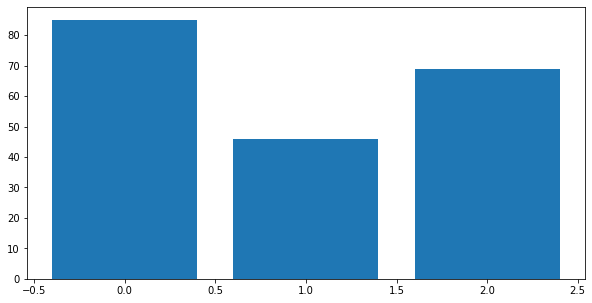

In [66]:
#Thống kê số MiniMart theo mỗi cụm:
import matplotlib.pyplot as plt
sum_cluster = df.Cluster.value_counts()
print(sum_cluster)

#Trực quan hóa dữ liệu
plt.figure(figsize=(10,5))
plt.bar(sum_cluster.index, sum_cluster.values)
plt.show()

# 2.

In [67]:
#Danh sách Minimart nhóm 1
cluster_0 = df[df.Cluster== 0]
cluster_0.reset_index(inplace=True)
cluster_0[['No', 'City', 'Distance', 'Grocery', 'Milk', 'Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,4,E,57,17100,8375,0
1,5,E,55,5500,5450,0
2,6,E,68,27200,8550,0
3,7,E,41,20500,4500,0
4,9,K,33,13200,8325,0
...,...,...,...,...,...,...
80,190,E,23,20600,2800,0
81,192,E,25,10000,2875,0
82,193,K,74,39200,5975,0
83,195,E,44,13200,5325,0


In [68]:
#Đặc trưng thống kê của thuộc tính phân cụm Minimart nhóm 1
cluster_0[['Grocery', 'Milk']].describe()

,Grocery,Milk
count,85.000000,85.000000
mean,22069.411765,5320.882353
std,11786.221006,1787.201719
min,0.000000,2600.000000
25%,13600.000000,4000.000000
50%,23700.000000,4925.000000
75%,32100.000000,6500.000000
max,39200.000000,8950.000000


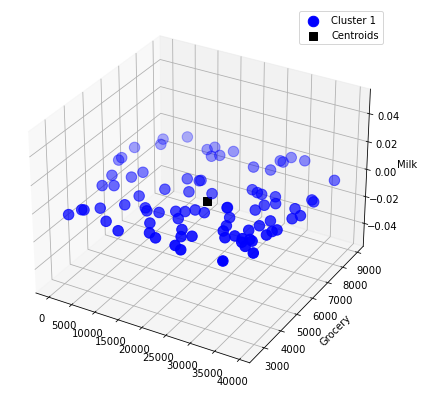

In [69]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_0["Grocery"], cluster_0["Milk"], c='blue', s=110, label = 'Cluster 1')
ax.scatter(model_mart.cluster_centers_[0, 0],
           model_mart.cluster_centers_[0, 1],
           color = 'black', label = 'Centroids',s=50,marker=',')
plt.ylabel("Grocery")
ax.set_zlabel("Milk")
plt.legend()
plt.show()

### Nhận xét

Đặc trưng của nhóm 1 là tâm cu

In [70]:
#Danh sách Minimart nhóm 2
cluster_1 = df[df.Cluster == 1]
cluster_1.reset_index(inplace=True)
cluster_1[['No', 'City', 'Distance', 'Grocery', 'Milk', 'Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,3,E,52,85500,7825,1
1,12,E,21,95800,6475,1
2,15,K,68,83000,8125,1
3,16,K,35,143500,8650,1
4,17,E,72,91300,5125,1
5,23,E,41,90900,5725,1
6,25,E,56,126800,7500,1
7,34,K,60,95600,7225,1
8,40,E,66,111300,8525,1
9,41,E,51,102700,8100,1


In [71]:
#Đặc trưng thống kê của thuộc tính phân cụm Minimart nhóm 2
cluster_1[['Grocery', 'Milk']].describe()

,Grocery,Milk
count,46.000000,46.000000
mean,104386.956522,7289.130435
std,18250.048508,1253.712843
min,83000.000000,4875.000000
25%,88425.000000,6375.000000
50%,98000.000000,7425.000000
75%,117925.000000,8118.750000
max,143500.000000,9575.000000


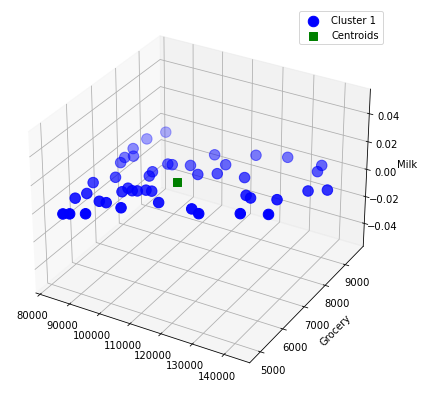

In [72]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1["Grocery"], cluster_1["Milk"], c='blue', s=110, label = 'Cluster 1')
ax.scatter(model_mart.cluster_centers_[1, 0],
           model_mart.cluster_centers_[1, 1],
           color = 'green', label = 'Centroids',s=50,marker=',')
plt.ylabel("Grocery")
ax.set_zlabel("Milk")
plt.legend()
plt.show()

### Nhận xét

In [73]:
#Danh sách Minimart nhóm 3
cluster_2 = df[df.Cluster == 2]
cluster_2.reset_index(inplace=True)
cluster_2[['No', 'City', 'Distance', 'Grocery', 'Milk', 'Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,1,K,60,69900,6325,2
1,2,K,30,79000,5200,2
2,8,E,20,69000,5050,2
3,11,K,33,59200,5700,2
4,13,E,48,46200,3850,2
...,...,...,...,...,...,...
64,183,K,38,59700,6975,2
65,191,E,57,44700,5450,2
66,194,E,44,75600,6175,2
67,199,K,30,42000,5500,2


In [74]:
#Đặc trưng thống kê của thuộc tính phân cụm Minimart nhóm 3
cluster_2[['Grocery', 'Milk']].describe()

,Grocery,Milk
count,69.000000,69.000000
mean,58643.478261,5844.927536
std,12245.016733,1593.239276
min,40400.000000,3250.000000
25%,47600.000000,4575.000000
50%,55700.000000,5525.000000
75%,69400.000000,6400.000000
max,80400.000000,10075.000000


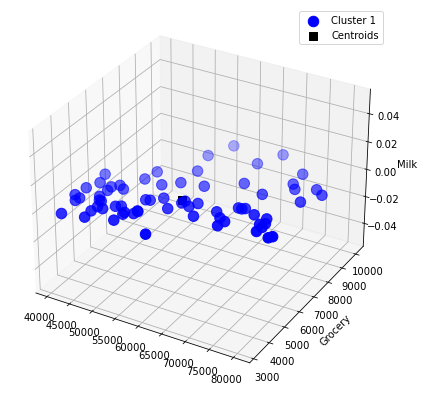

In [76]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_2["Grocery"], cluster_2["Milk"], c='blue', s=110, label = 'Cluster 1')
ax.scatter(model_mart.cluster_centers_[2, 0],
           model_mart.cluster_centers_[2, 1],
           color = 'Black', label = 'Centroids',s=50,marker=',')
plt.ylabel("Grocery")
ax.set_zlabel("Milk")
plt.legend()
plt.show()

### Nhận xét